In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("INFY.csv")
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,INFOSYSTCH,EQ,408.00,407.0,407.9,405.00,NaN,407.90,406.48,400,1.625900e+10,NaN,NaN,NaN
1,1996-01-02,INFOSYSTCH,EQ,407.90,407.0,409.0,406.25,NaN,406.25,407.58,400,1.630300e+10,NaN,NaN,NaN
2,1996-01-03,INFOSYSTCH,EQ,406.25,409.0,409.0,409.00,NaN,409.00,409.00,200,8.180000e+09,NaN,NaN,NaN
3,1996-01-04,INFOSYSTCH,EQ,409.00,405.0,407.0,405.00,NaN,406.30,405.65,600,2.433900e+10,NaN,NaN,NaN
4,1996-01-05,INFOSYSTCH,EQ,406.30,401.5,401.5,401.50,NaN,401.50,401.50,100,4.015000e+09,NaN,NaN,NaN


In [3]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6348 entries, 0 to 6347
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6348 non-null   object 
 1   Symbol              6348 non-null   object 
 2   Series              6348 non-null   object 
 3   Prev Close          6348 non-null   float64
 4   Open                6348 non-null   float64
 5   High                6348 non-null   float64
 6   Low                 6348 non-null   float64
 7   Last                5802 non-null   float64
 8   Close               6348 non-null   float64
 9   VWAP                6348 non-null   float64
 10  Volume              6348 non-null   int64  
 11  Turnover            6348 non-null   float64
 12  Trades              2501 non-null   float64
 13  Deliverable Volume  4843 non-null   float64
 14  %Deliverble         4843 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 744.0

In [45]:
df1 = df[['Date','Close']]
df1.shape

(6348, 2)

In [7]:
pred_days = 15
reward = 15
risk =1
days_shape = 60
eps = 1


df1['Xth'] = df1['Close'].shift(-1* pred_days)
print(len(df1.Close))

6348


C:\Users\abhij\AppData\Local\Temp\ipykernel_13172\3757992879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Xth'] = df1['Close'].shift(-1* pred_days)


In [8]:


c1 = []
for i in range(1,days_shape):
    df1['temp'] = df1['Xth'] - df1['Xth'].shift(-1*i)
    df1['temp'] = df1['temp']/df1['Xth']*100
    c1.append(df1['temp'].to_numpy())

print(c1)    
df2 = pd.DataFrame(c1)
df3 = df2.transpose()
df3.head(10)

[array([0.31446541, 0.44164038, 0.38022814, ...,        nan,        nan,
              nan]), array([0.75471698, 0.82018927, 0.95057034, ...,        nan,        nan,
              nan]), array([ 1.13207547,  1.38801262, -0.25348542, ...,         nan,
               nan,         nan]), array([ 1.69811321,  0.18927445, -1.39416984, ...,         nan,
               nan,         nan]), array([ 0.50314465, -0.94637224, -5.1964512 , ...,         nan,
               nan,         nan]), array([-0.62893082, -4.7318612 , -8.9860583 , ...,         nan,
               nan,         nan]), array([-4.40251572, -8.50473186, -8.99873257, ...,         nan,
               nan,         nan]), array([ -8.16352201,  -8.51735016, -11.53358682, ...,          nan,
                nan,          nan]), array([ -8.17610063, -11.04100946,  -8.56780735, ...,          nan,
                nan,          nan]), array([-10.6918239 ,  -8.08832808, -15.33586819, ...,          nan,
                nan,          nan]), arr

C:\Users\abhij\AppData\Local\Temp\ipykernel_13172\308277172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp'] = df1['Xth'] - df1['Xth'].shift(-1*i)
C:\Users\abhij\AppData\Local\Temp\ipykernel_13172\308277172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp'] = df1['temp']/df1['Xth']*100


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.314465,0.754717,1.132075,1.698113,0.503145,-0.628931,-4.402516,-8.163522,-8.176101,-10.691824,...,-32.955975,-40.251572,-38.616352,-40.729560,-49.433962,-55.421384,-63.044025,-61.232704,-60.000000,-56.226415
1,0.441640,0.820189,1.388013,0.189274,-0.946372,-4.731861,-8.504732,-8.517350,-11.041009,-8.088328,...,-40.694006,-39.053628,-41.173502,-49.905363,-55.911672,-63.558360,-61.741325,-60.504732,-56.719243,-57.375394
2,0.380228,0.950570,-0.253485,-1.394170,-5.196451,-8.986058,-8.998733,-11.533587,-8.567807,-15.335868,...,-39.670469,-41.799747,-50.570342,-56.603295,-64.283904,-62.458809,-61.216730,-57.414449,-58.073511,-61.229404
3,0.572519,-0.636132,-1.781170,-5.597964,-9.402036,-9.414758,-11.959288,-8.982188,-15.776081,-20.190840,...,-42.340967,-51.145038,-57.201018,-64.910941,-63.078880,-61.832061,-58.015267,-58.676845,-61.844784,-61.603053
4,-1.215611,-2.367242,-6.206014,-10.031990,-10.044786,-12.603967,-9.609725,-16.442738,-20.882917,-19.513756,...,-52.015355,-58.106206,-65.860525,-64.017914,-62.763916,-58.925144,-59.590531,-62.776711,-62.533589,-62.136916
5,-1.137800,-4.930468,-8.710493,-8.723135,-11.251580,-8.293300,-15.044248,-19.431100,-18.078382,-23.893805,...,-56.207332,-63.868521,-62.048040,-60.809102,-57.016435,-57.673831,-60.821745,-60.581542,-60.189633,-59.039191
6,-3.750000,-7.487500,-7.500000,-10.000000,-7.075000,-13.750000,-18.087500,-16.750000,-22.500000,-27.125000,...,-62.025000,-60.225000,-59.000000,-55.250000,-55.900000,-59.012500,-58.775000,-58.387500,-57.250000,-57.625000
7,-3.602410,-3.614458,-6.024096,-3.204819,-9.638554,-13.819277,-12.530120,-18.072289,-22.530120,-23.686747,...,-54.433735,-53.253012,-49.638554,-50.265060,-53.265060,-53.036145,-52.662651,-51.566265,-51.927711,-51.927711
8,-0.011629,-2.337481,0.383766,-5.826259,-9.861612,-8.617281,-13.966740,-18.269566,-19.385975,-19.723224,...,-47.924177,-44.435399,-45.040121,-47.935806,-47.714851,-47.354344,-46.296081,-46.644959,-46.644959,-49.319688
9,-2.325581,0.395349,-5.813953,-9.848837,-8.604651,-13.953488,-18.255814,-19.372093,-19.709302,-17.232558,...,-44.418605,-45.023256,-47.918605,-47.697674,-47.337209,-46.279070,-46.627907,-46.627907,-49.302326,-49.360465


In [9]:
df3.shape


(6348, 59)

In [10]:
c2 =df3.to_numpy()
c2

array([[  0.31446541,   0.75471698,   1.13207547, ..., -61.2327044 ,
        -60.        , -56.22641509],
       [  0.44164038,   0.82018927,   1.38801262, ..., -60.50473186,
        -56.7192429 , -57.37539432],
       [  0.38022814,   0.95057034,  -0.25348542, ..., -57.41444867,
        -58.07351077, -61.22940431],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [11]:
len(c2)


6348

In [12]:
c3 =[]

for i in range(int(len(c2)-days_shape)):
      
    c6 = np.concatenate((c2[i:i+days_shape]))
    
    c3.append(c6)
    
                

In [13]:
c3[1:3]

[array([  0.44164038,   0.82018927,   1.38801262, ..., -13.2456703 ,
        -13.67864015, -12.73252085]),
 array([  0.38022814,   0.95057034,  -0.25348542, ..., -11.45350208,
        -10.52590205,  -8.74931216])]

In [14]:
df4 = pd.DataFrame(c3)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539
0,0.314465,0.754717,1.132075,1.698113,0.503145,-0.628931,-4.402516,-8.163522,-8.176101,-10.691824,...,-14.009662,-13.800322,-13.172303,-12.721417,-12.399356,-11.714976,-11.916264,-14.331723,-13.719807,-14.154589
1,0.441640,0.820189,1.388013,0.189274,-0.946372,-4.731861,-8.504732,-8.517350,-11.041009,-8.088328,...,-13.325850,-12.700449,-12.251443,-11.930725,-11.249198,-11.449647,-13.855035,-13.245670,-13.678640,-12.732521
2,0.380228,0.950570,-0.253485,-1.394170,-5.196451,-8.986058,-8.998733,-11.533587,-8.567807,-15.335868,...,-10.494458,-10.054241,-9.739800,-9.071614,-9.268139,-11.626444,-11.029007,-11.453502,-10.525902,-8.749312
3,0.572519,-0.636132,-1.781170,-5.597964,-9.402036,-9.414758,-11.959288,-8.982188,-15.776081,-20.190840,...,-10.218863,-9.903952,-9.234766,-9.431586,-11.793418,-11.195087,-11.620217,-10.691230,-8.911982,-9.470949
4,-1.215611,-2.367242,-6.206014,-10.031990,-10.044786,-12.603967,-9.609725,-16.442738,-20.882917,-19.513756,...,-10.172836,-9.502012,-9.699313,-12.066924,-11.467130,-11.893300,-10.962039,-9.178439,-9.738774,-10.212296
5,-1.137800,-4.930468,-8.710493,-8.723135,-11.251580,-8.293300,-15.044248,-19.431100,-18.078382,-23.893805,...,-10.294118,-10.492846,-12.877583,-12.273450,-12.702703,-11.764706,-9.968203,-10.532591,-11.009539,-11.287758
6,-3.750000,-7.487500,-7.500000,-10.000000,-7.075000,-13.750000,-18.087500,-16.750000,-22.500000,-27.125000,...,-10.229976,-12.609040,-12.006344,-12.434576,-11.498810,-9.706582,-10.269627,-10.745440,-11.022998,-10.063442
7,-3.602410,-3.614458,-6.024096,-3.204819,-9.638554,-13.819277,-12.530120,-18.072289,-22.530120,-23.686747,...,-12.609040,-12.006344,-12.434576,-11.498810,-9.706582,-10.269627,-10.745440,-11.022998,-10.063442,-8.643933
8,-0.011629,-2.337481,0.383766,-5.826259,-9.861612,-8.617281,-13.966740,-18.269566,-19.385975,-19.723224,...,-10.000000,-10.420561,-9.501558,-7.741433,-8.294393,-8.761682,-9.034268,-8.091900,-6.697819,-8.271028
9,-2.325581,0.395349,-5.813953,-9.848837,-8.604651,-13.953488,-18.255814,-19.372093,-19.709302,-17.232558,...,-10.377579,-9.458933,-7.699494,-8.252238,-8.719346,-8.991826,-8.049825,-6.656286,-8.228883,-6.811989


In [15]:
df4.shape

(6288, 3540)

In [16]:
df1.shape

(6348, 4)

In [17]:
aes = df1.shape[0]

In [18]:
df4['Close'] = df1.iloc[:aes]['Close']

df4['Xth'] = df1.iloc[:aes]['Xth']
df4.shape

(6288, 3542)

In [19]:
df3.head(5)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.314465,0.754717,1.132075,1.698113,0.503145,-0.628931,-4.402516,-8.163522,-8.176101,-10.691824,...,-32.955975,-40.251572,-38.616352,-40.729560,-49.433962,-55.421384,-63.044025,-61.232704,-60.000000,-56.226415
1,0.441640,0.820189,1.388013,0.189274,-0.946372,-4.731861,-8.504732,-8.517350,-11.041009,-8.088328,...,-40.694006,-39.053628,-41.173502,-49.905363,-55.911672,-63.558360,-61.741325,-60.504732,-56.719243,-57.375394
2,0.380228,0.950570,-0.253485,-1.394170,-5.196451,-8.986058,-8.998733,-11.533587,-8.567807,-15.335868,...,-39.670469,-41.799747,-50.570342,-56.603295,-64.283904,-62.458809,-61.216730,-57.414449,-58.073511,-61.229404
3,0.572519,-0.636132,-1.781170,-5.597964,-9.402036,-9.414758,-11.959288,-8.982188,-15.776081,-20.190840,...,-42.340967,-51.145038,-57.201018,-64.910941,-63.078880,-61.832061,-58.015267,-58.676845,-61.844784,-61.603053
4,-1.215611,-2.367242,-6.206014,-10.031990,-10.044786,-12.603967,-9.609725,-16.442738,-20.882917,-19.513756,...,-52.015355,-58.106206,-65.860525,-64.017914,-62.763916,-58.925144,-59.590531,-62.776711,-62.533589,-62.136916


In [20]:
df4.shape

(6288, 3542)

In [21]:
df5 = df4.dropna()


In [22]:
df5.shape
        

(6215, 3542)

In [23]:
len(df5[df5[7]>6])

730

In [24]:
len(df5[df5[7]<2])

4539

In [25]:
df6 = df5
df6 = df6.assign(result = lambda x: ((x['Close'] - x['Xth'])/x['Xth']*100)>reward)
    
df6['result'].value_counts()  

False    5792
True      423
Name: result, dtype: int64

In [26]:
for i in range(len(df6.result)):
    if df6['result'][i] == False:
       df6['result'][i] = 0
    else:
       df6['result'][i] = 1
        

C:\Users\abhij\AppData\Local\Temp\ipykernel_13172\4073025108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['result'][i] = 0


In [27]:
df6.result.describe()

count     6215
unique       2
top          0
freq      5792
Name: result, dtype: int64

In [28]:
df6.head()

,0,1,2,3,4,5,6,7,8,9,...,3533,3534,3535,3536,3537,3538,3539,Close,Xth,result
0,0.314465,0.754717,1.132075,1.698113,0.503145,-0.628931,-4.402516,-8.163522,-8.176101,-10.691824,...,-12.721417,-12.399356,-11.714976,-11.916264,-14.331723,-13.719807,-14.154589,407.90,397.50,0
1,0.441640,0.820189,1.388013,0.189274,-0.946372,-4.731861,-8.504732,-8.517350,-11.041009,-8.088328,...,-11.930725,-11.249198,-11.449647,-13.855035,-13.245670,-13.678640,-12.732521,406.25,396.25,0
2,0.380228,0.950570,-0.253485,-1.394170,-5.196451,-8.986058,-8.998733,-11.533587,-8.567807,-15.335868,...,-9.071614,-9.268139,-11.626444,-11.029007,-11.453502,-10.525902,-8.749312,409.00,394.50,0
3,0.572519,-0.636132,-1.781170,-5.597964,-9.402036,-9.414758,-11.959288,-8.982188,-15.776081,-20.190840,...,-9.431586,-11.793418,-11.195087,-11.620217,-10.691230,-8.911982,-9.470949,406.30,393.00,0
4,-1.215611,-2.367242,-6.206014,-10.031990,-10.044786,-12.603967,-9.609725,-16.442738,-20.882917,-19.513756,...,-12.066924,-11.467130,-11.893300,-10.962039,-9.178439,-9.738774,-10.212296,401.50,390.75,0


In [29]:
df7 = df6.drop(['Close','Xth'],axis=1)
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,3531,3532,3533,3534,3535,3536,3537,3538,3539,result
0,0.314465,0.754717,1.132075,1.698113,0.503145,-0.628931,-4.402516,-8.163522,-8.176101,-10.691824,...,-13.800322,-13.172303,-12.721417,-12.399356,-11.714976,-11.916264,-14.331723,-13.719807,-14.154589,0
1,0.441640,0.820189,1.388013,0.189274,-0.946372,-4.731861,-8.504732,-8.517350,-11.041009,-8.088328,...,-12.700449,-12.251443,-11.930725,-11.249198,-11.449647,-13.855035,-13.245670,-13.678640,-12.732521,0
2,0.380228,0.950570,-0.253485,-1.394170,-5.196451,-8.986058,-8.998733,-11.533587,-8.567807,-15.335868,...,-10.054241,-9.739800,-9.071614,-9.268139,-11.626444,-11.029007,-11.453502,-10.525902,-8.749312,0
3,0.572519,-0.636132,-1.781170,-5.597964,-9.402036,-9.414758,-11.959288,-8.982188,-15.776081,-20.190840,...,-9.903952,-9.234766,-9.431586,-11.793418,-11.195087,-11.620217,-10.691230,-8.911982,-9.470949,0
4,-1.215611,-2.367242,-6.206014,-10.031990,-10.044786,-12.603967,-9.609725,-16.442738,-20.882917,-19.513756,...,-9.502012,-9.699313,-12.066924,-11.467130,-11.893300,-10.962039,-9.178439,-9.738774,-10.212296,0


In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
X = df7.drop('result',axis='columns')
y = df7["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [32]:
X_train.shape

(4972, 3540)

In [33]:
X_test.shape

(1243, 3540)

In [50]:
X_test.iloc[0].shape

(3540,)

In [46]:
aess = X_test.shape[1]

In [35]:
import numpy as np

X_train1 = np.asarray(X_train).astype(np.float32)
X_test1 = np.asarray(X_test).astype(np.float32)
y_train1 = np.asarray(y_train).astype(np.float32)
y_test1 = np.asarray(y_test).astype(np.float32)

In [36]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(aess, input_shape=(aess,), activation='sigmoid'),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(240, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train1, y_train1, epochs=eps)

156/156 [==============================] - 14s 86ms/step - loss: 0.2656 - accuracy: 0.9274


In [37]:
model.evaluate(X_test1, y_test1)

39/39 [==============================] - 0s 9ms/step - loss: 0.2771 - accuracy: 0.9348


[0.27708691358566284, 0.9348350763320923]

In [38]:
yp = model.predict(X_test)
yp[:5]

39/39 [==============================] - 0s 10ms/step


array([[0.02088815],
       [0.00796301],
       [0.02078326],
       [0.01405675],
       [0.01053896]], dtype=float32)

In [39]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      1162
         1.0       0.00      0.00      0.00        81

    accuracy                           0.93      1243
   macro avg       0.47      0.50      0.48      1243
weighted avg       0.87      0.93      0.90      1243



C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

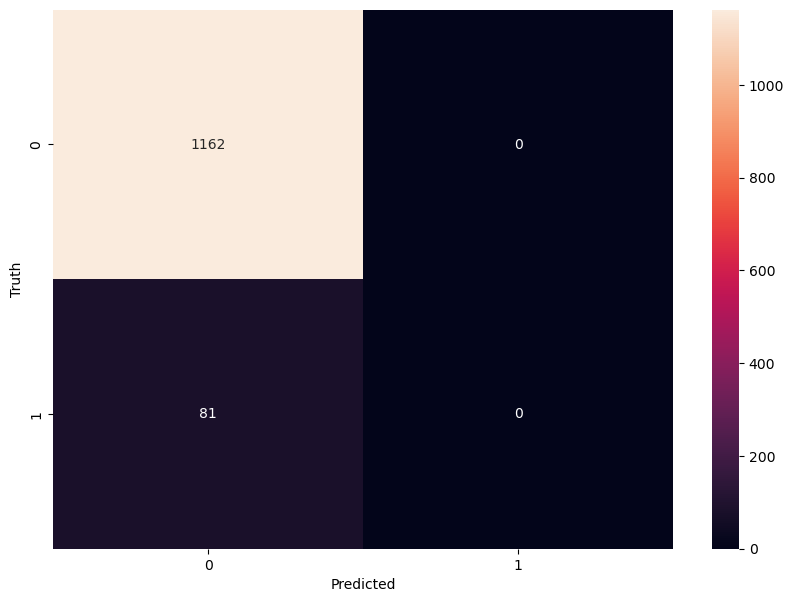

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test1,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
import joblib

In [43]:
joblib.dump(model, 'model33.pkl')

['model33.pkl']